In [36]:
%matplotlib inline

import cv2 # The OpenCV library; install using `pip install opencv-contrib-python`
import numpy as np # Helpful when working with arrays; install using `pip install numpy`
from matplotlib import pyplot as plt # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
import easygui # An easy-to-use file-picker; pip install easygui

debug = 1 #set to 1 to see each step set to 0 to run fast
cursed = 0 #a weird bug i wanted to show to a freind dont ever set to 1 (ill delet this once ive shown them)

take in the image of the dice and set it up corectly

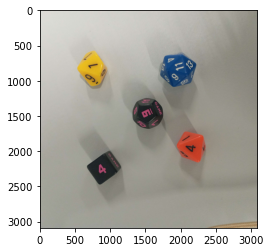

In [23]:
fileName = easygui.fileopenbox(filetypes=["*.jpg","*.jpeg","*.png"])
diceRaw = cv2.imread(fileName,cv2.IMREAD_COLOR)
#if its a jpg it will need to have its color converted
if(fileName[-4:] == ".jpg" or fileName[5:] == ".jpeg"):
    diceRaw = cv2.cvtColor(diceRaw,cv2.COLOR_RGB2BGR)
if debug == 1:
    plt.imshow(diceRaw)

make the image grey

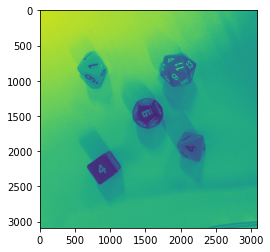

In [24]:
diceGrey = cv2.cvtColor(diceRaw, cv2.COLOR_BGR2GRAY)
if debug == 1:
    plt.imshow(diceGrey)

threhold the image (using stats!)

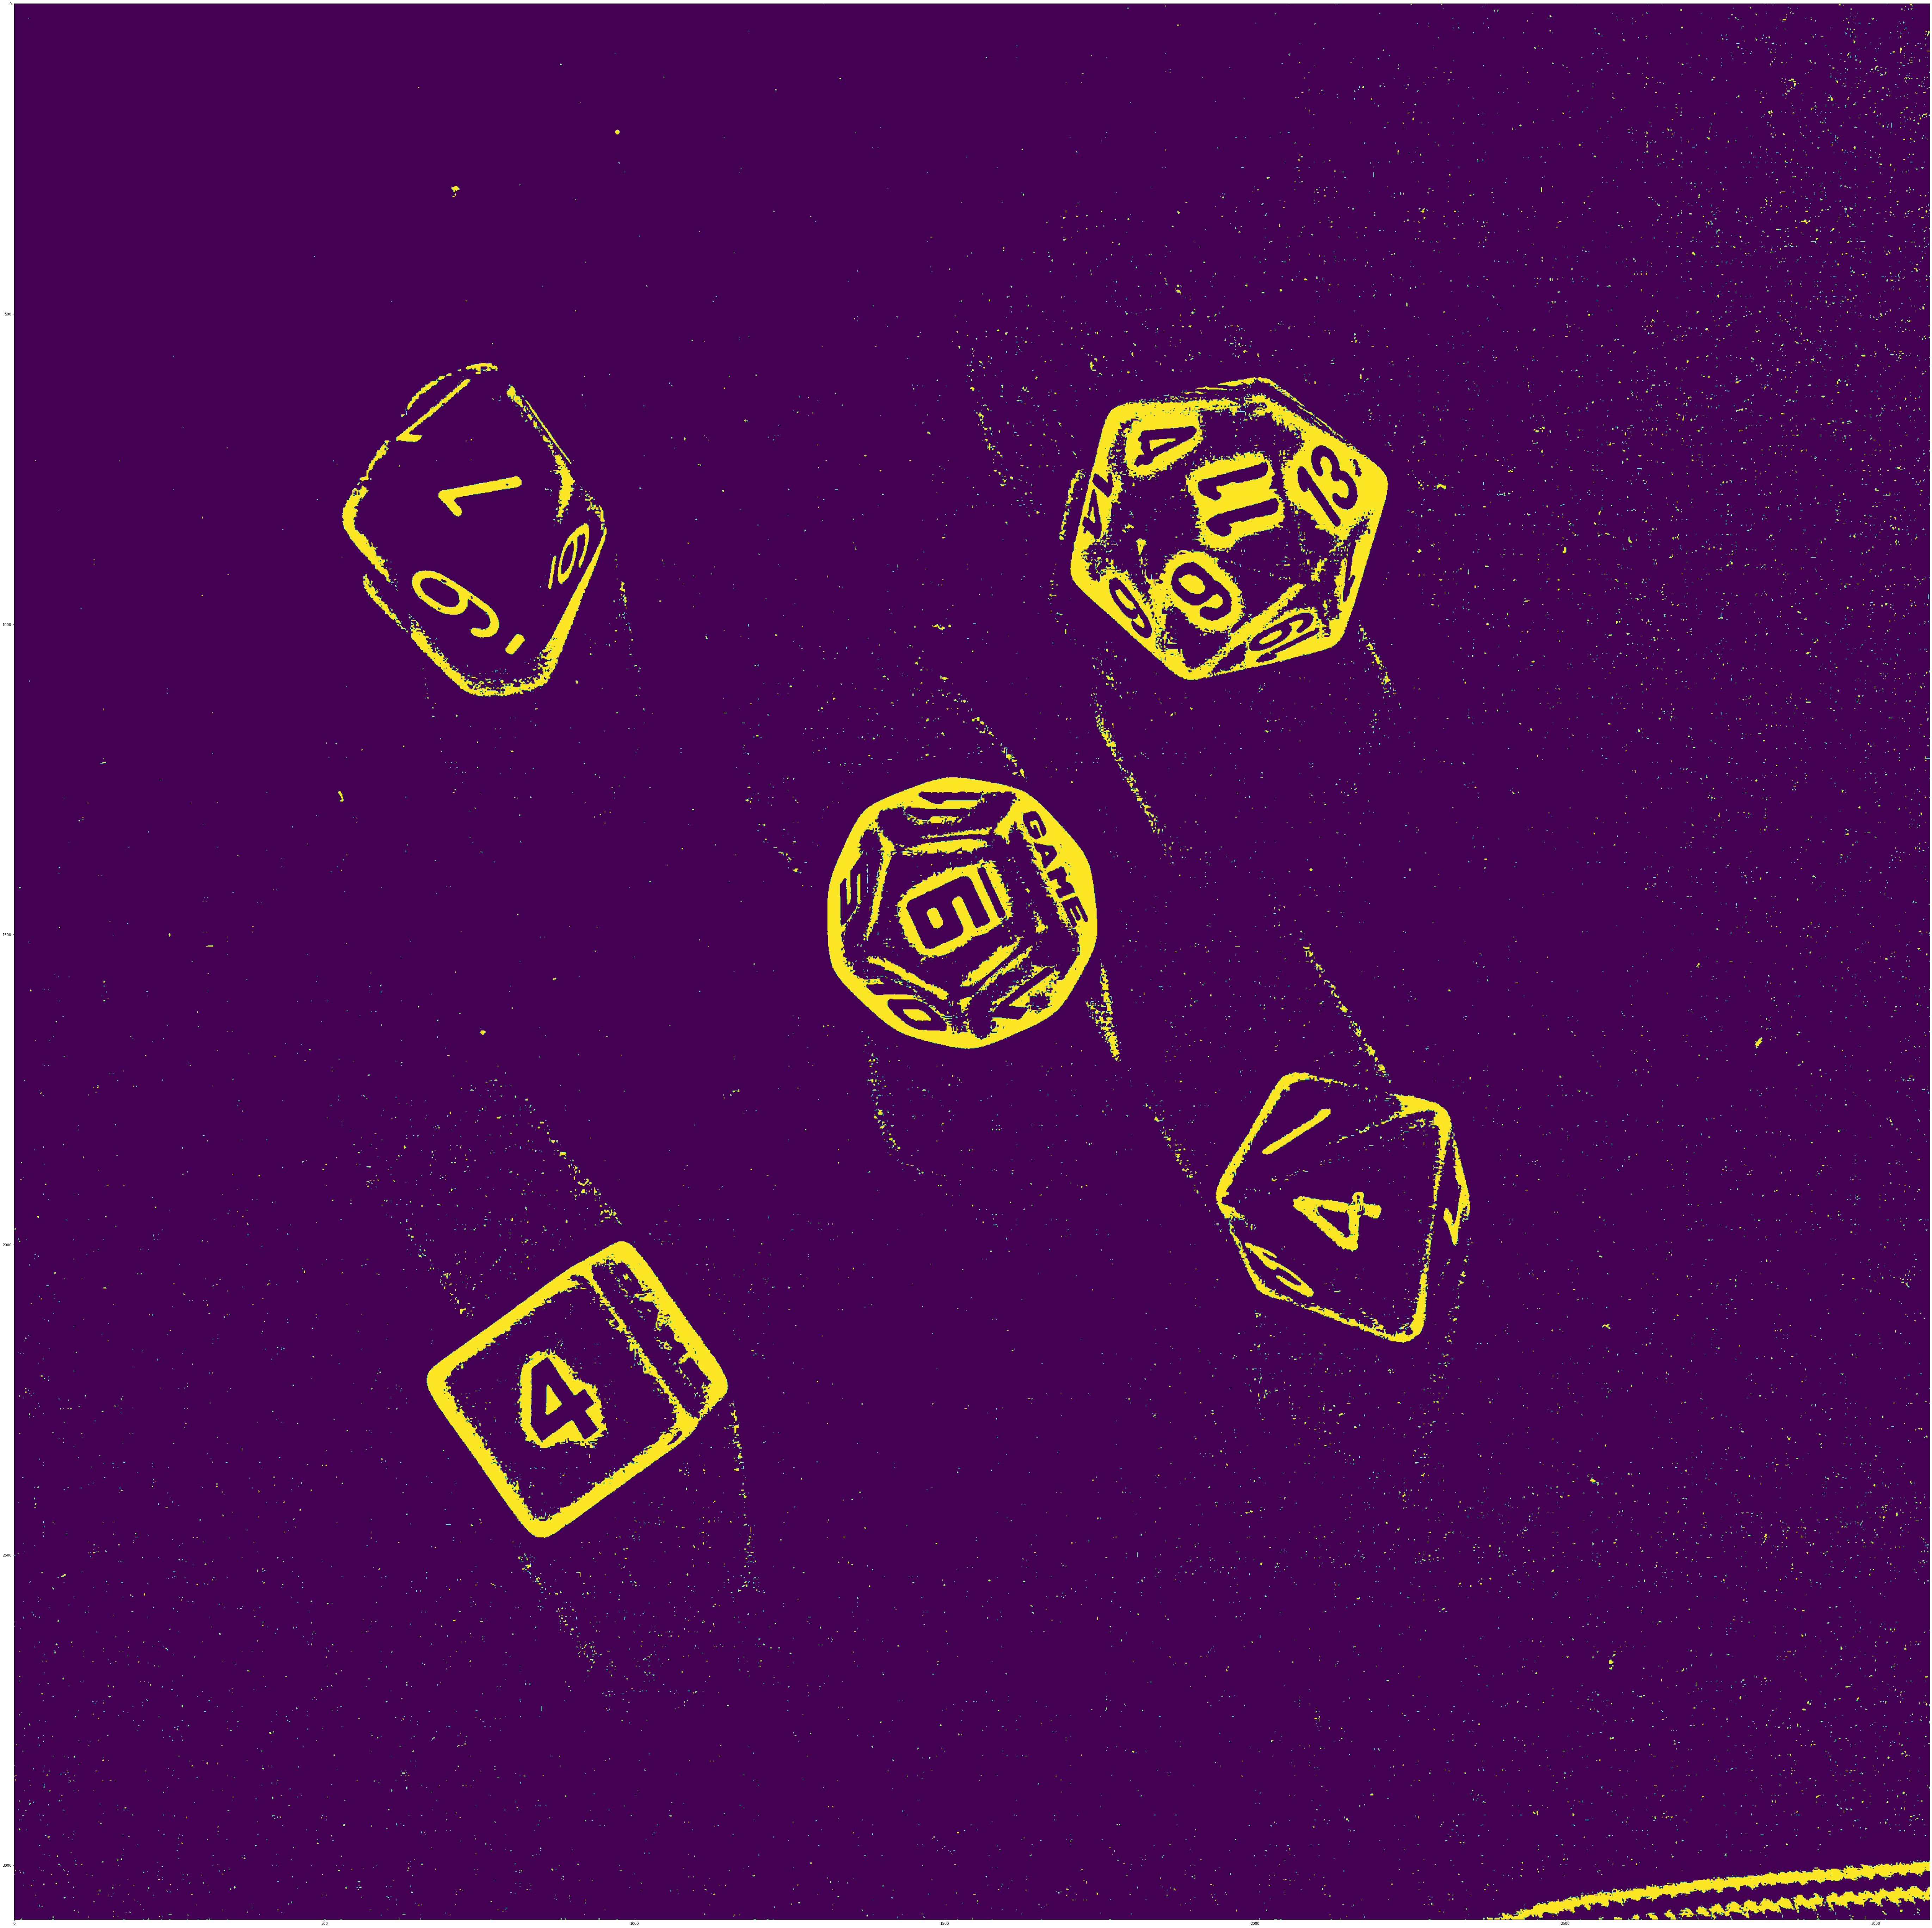

In [35]:
#MAGIC
thresholdConsant = (np.mean(diceGrey) + np.std(diceGrey))/25
threshholdedAllDice = cv2.adaptiveThreshold(diceGrey, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 501,thresholdConsant)
if debug ==5 1:
    plt.figure(figsize=(100,100))
    plt.imshow(threshholdedAllDice)

preform some clean up on the image so that making the conturs dosent take a millon years

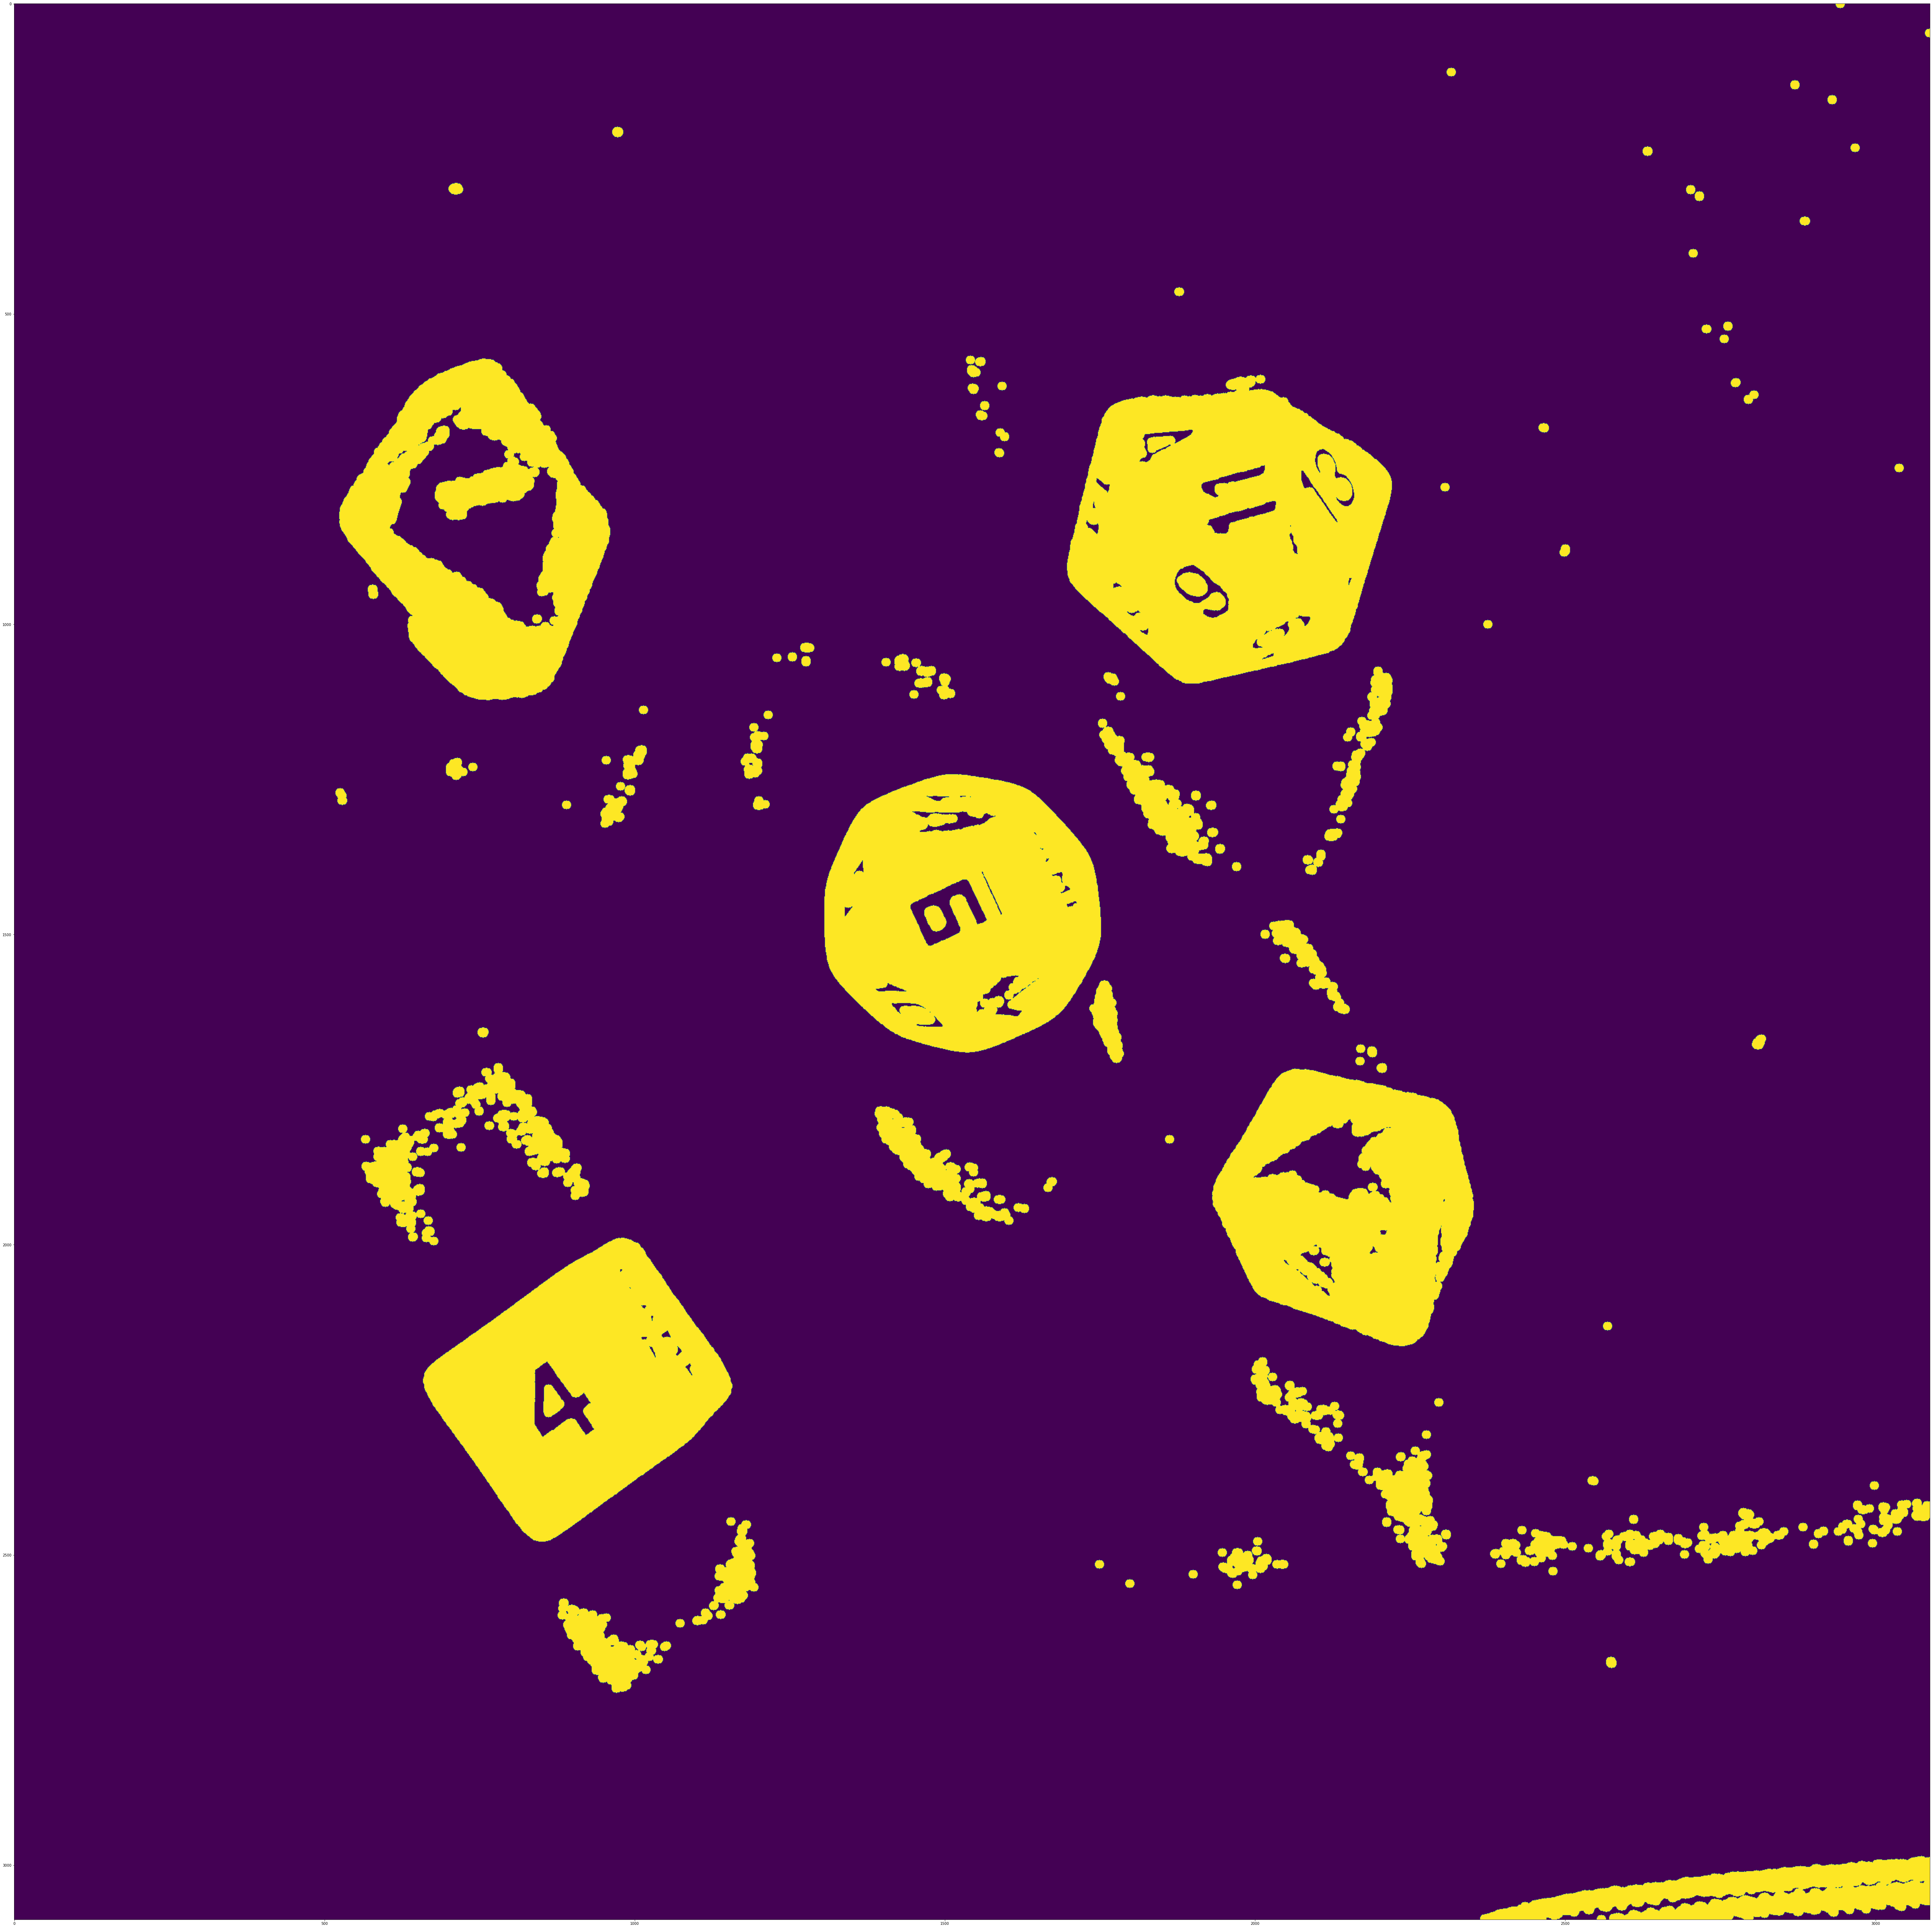

In [26]:
#MAGIC 
circle4x4 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))
circle10x10 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
circle3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
circle15x15 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))

diceMask = cv2.erode(threshholdedAllDice,circle4x4)
diceMask = cv2.dilate(diceMask,circle15x15)
#diceMask = cv2.erode(threshholdedAllDice,circle15x15)
#diceMask = cv2.dilate(diceMask,circle15x15)
#diceMask = cv2.dilate(diceMask,circle15x15)


if debug == 1:
    plt.figure(figsize=(100,100))
    plt.imshow(diceMask)

where going to make a few assumtions here:

    1 the largeret contour is a dice

    2 any contur 50 smaller than the largest contur isnt a dice
    
    with this we can filter out all the little dots that got left over

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147


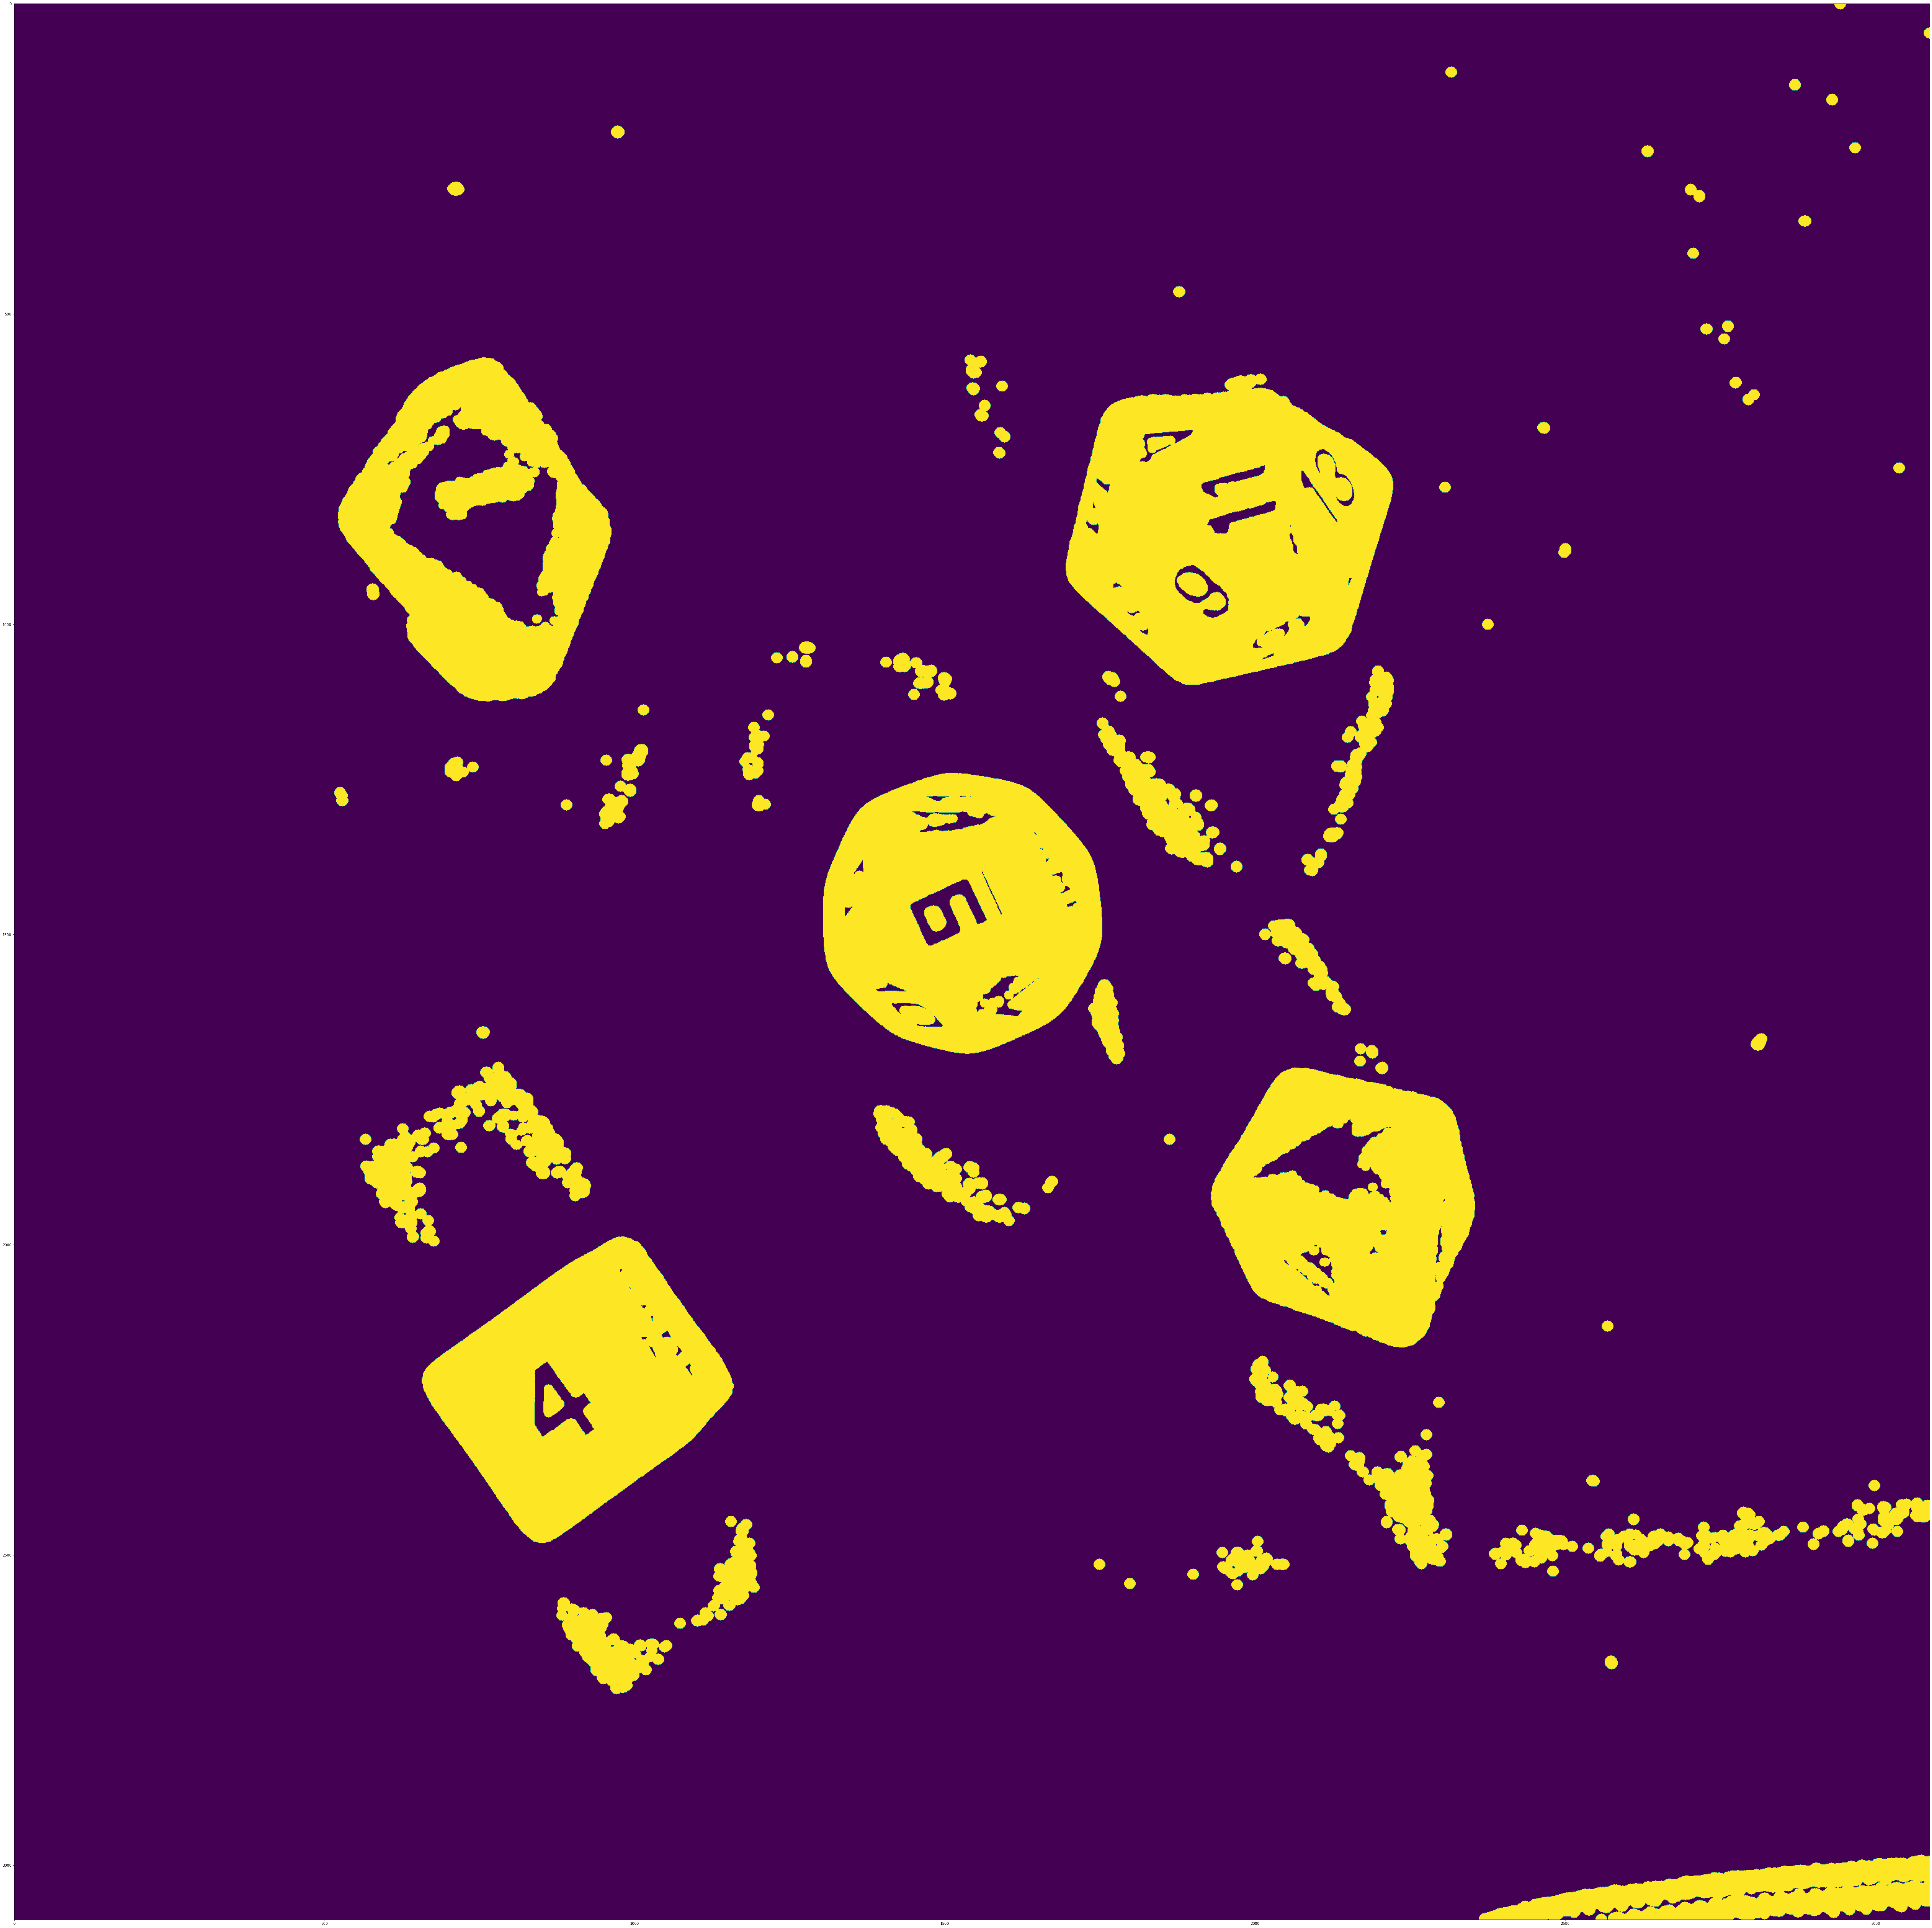

In [27]:
#step 1 getting the largest contur
contours, hierarchy  = cv2.findContours(diceMask, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_NONE)
if debug == 1:
    tempImg = cv2.drawContours(diceMask, contours, -1, (255), 3)
    plt.figure(figsize=(100,100))
    plt.imshow(tempImg)

largestContour = 0
for i in range(len(hierarchy[0])):
    if debug == 1:
        print(i)
    if (cv2.contourArea(contours[i]) > cv2.contourArea(contours[largestContour])):
        largestContour = i

so now that we have the largest contur where going to check each contur and see if its small than 50% of the largest one
if it is discard it if it isnt we will add its bounding box to the array

bounding boxes have a X cord a Y cord and a height and a width so the array is a 2d array with that strucher

In [28]:
#some cursed stuff that doent work
if cursed == 1:
    firstArrayToAdd = [0,0,0,0]
    firstArrayToAdd[0],arrayToAdd[1],arrayToAdd[2],arrayToAdd[3] = cv2.boundingRect(contours[largestContour])
    boundingBoxes = [firstArrayToAdd]
    for i in range(len(hierarchy[0])):
        if debug == 1:
            print(cv2.boundingRect(contours[i]))
        if (cv2.contourArea(contours[i]) > (cv2.contourArea(contours[largestContour]))/2):
            arrayToAdd[0],arrayToAdd[1],arrayToAdd[2],arrayToAdd[3] = cv2.boundingRect(contours[i])
            if debug == 1:
                print(arrayToAdd)
            boundingBoxes.extend([arrayToAdd])
            if debug == 1:
                print("added:")
                print(arrayToAdd)
                print("bounding boxes is now:")
                print(boundingBoxes)
    if debug ==1:
        print(boundingBoxes)
else:
    boundingBoxes = []
    for i in range(len(hierarchy[0])):
        if debug == 1:
            print(cv2.boundingRect(contours[i]))
        if (cv2.contourArea(contours[i]) > (cv2.contourArea(contours[largestContour]))/2):
            j = len(boundingBoxes)
            boundingBoxes.extend([cv2.boundingRect(contours[i])])
    if debug == 1:
        print("bounding boxes is:")
        print(boundingBoxes)
    

(2551, 3080, 15, 8)
(2363, 2985, 725, 103)
(2566, 2664, 17, 19)
(1041, 2639, 18, 17)
(1066, 2603, 15, 15)
(1131, 2589, 16, 15)
(1093, 2586, 33, 28)
(876, 2570, 170, 153)
(1964, 2541, 15, 15)
(1791, 2539, 15, 15)
(1893, 2524, 15, 15)
(2473, 2519, 15, 15)
(2028, 2508, 26, 15)
(1742, 2508, 15, 15)
(2389, 2507, 15, 15)
(2596, 2504, 17, 15)
(2685, 2492, 15, 15)
(1940, 2489, 15, 15)
(2530, 2482, 15, 15)
(2893, 2475, 15, 16)
(2988, 2474, 15, 15)
(1941, 2471, 86, 69)
(2949, 2469, 15, 17)
(2675, 2466, 30, 24)
(2549, 2459, 125, 57)
(2379, 2458, 140, 62)
(3028, 2455, 15, 15)
(2901, 2454, 23, 20)
(2423, 2453, 15, 15)
(2876, 2448, 15, 15)
(1120, 2444, 80, 146)
(2205, 2439, 15, 17)
(1148, 2439, 15, 15)
(2933, 2435, 51, 41)
(2603, 2435, 15, 16)
(2709, 2424, 151, 91)
(2964, 2412, 34, 23)
(2989, 2411, 69, 61)
(3058, 2409, 30, 37)
(2991, 2381, 15, 15)
(2536, 2373, 18, 16)
(2227, 2334, 16, 16)
(2147, 2333, 35, 41)
(2177, 2325, 139, 197)
(2269, 2299, 15, 15)
(2289, 2247, 15, 15)
(1993, 2181, 151, 153)
(25

time to crop the orginal image into indvidual dice

In [29]:
diceImages = []
print((np.size(boundingBoxes)/4))
for i in range(0,int((np.size(boundingBoxes)/4))):#posibly the worst line of code ive ever writen
    x,y,w,h = boundingBoxes[i]
    diceImages.append(diceRaw[y:y+h,x:x+w])
    if debug == 1:
        print(i)
        print(boundingBoxes[i])

5.0
0
(659, 1989, 499, 490)
1
(1931, 1716, 422, 448)
2
(1306, 1242, 446, 449)
3
(1697, 598, 524, 498)
4
(524, 572, 437, 551)


ok so now that we have those images we need to detect which kind of dice they are and run a top face idenfication program on them and then read the number out of that good luck us!

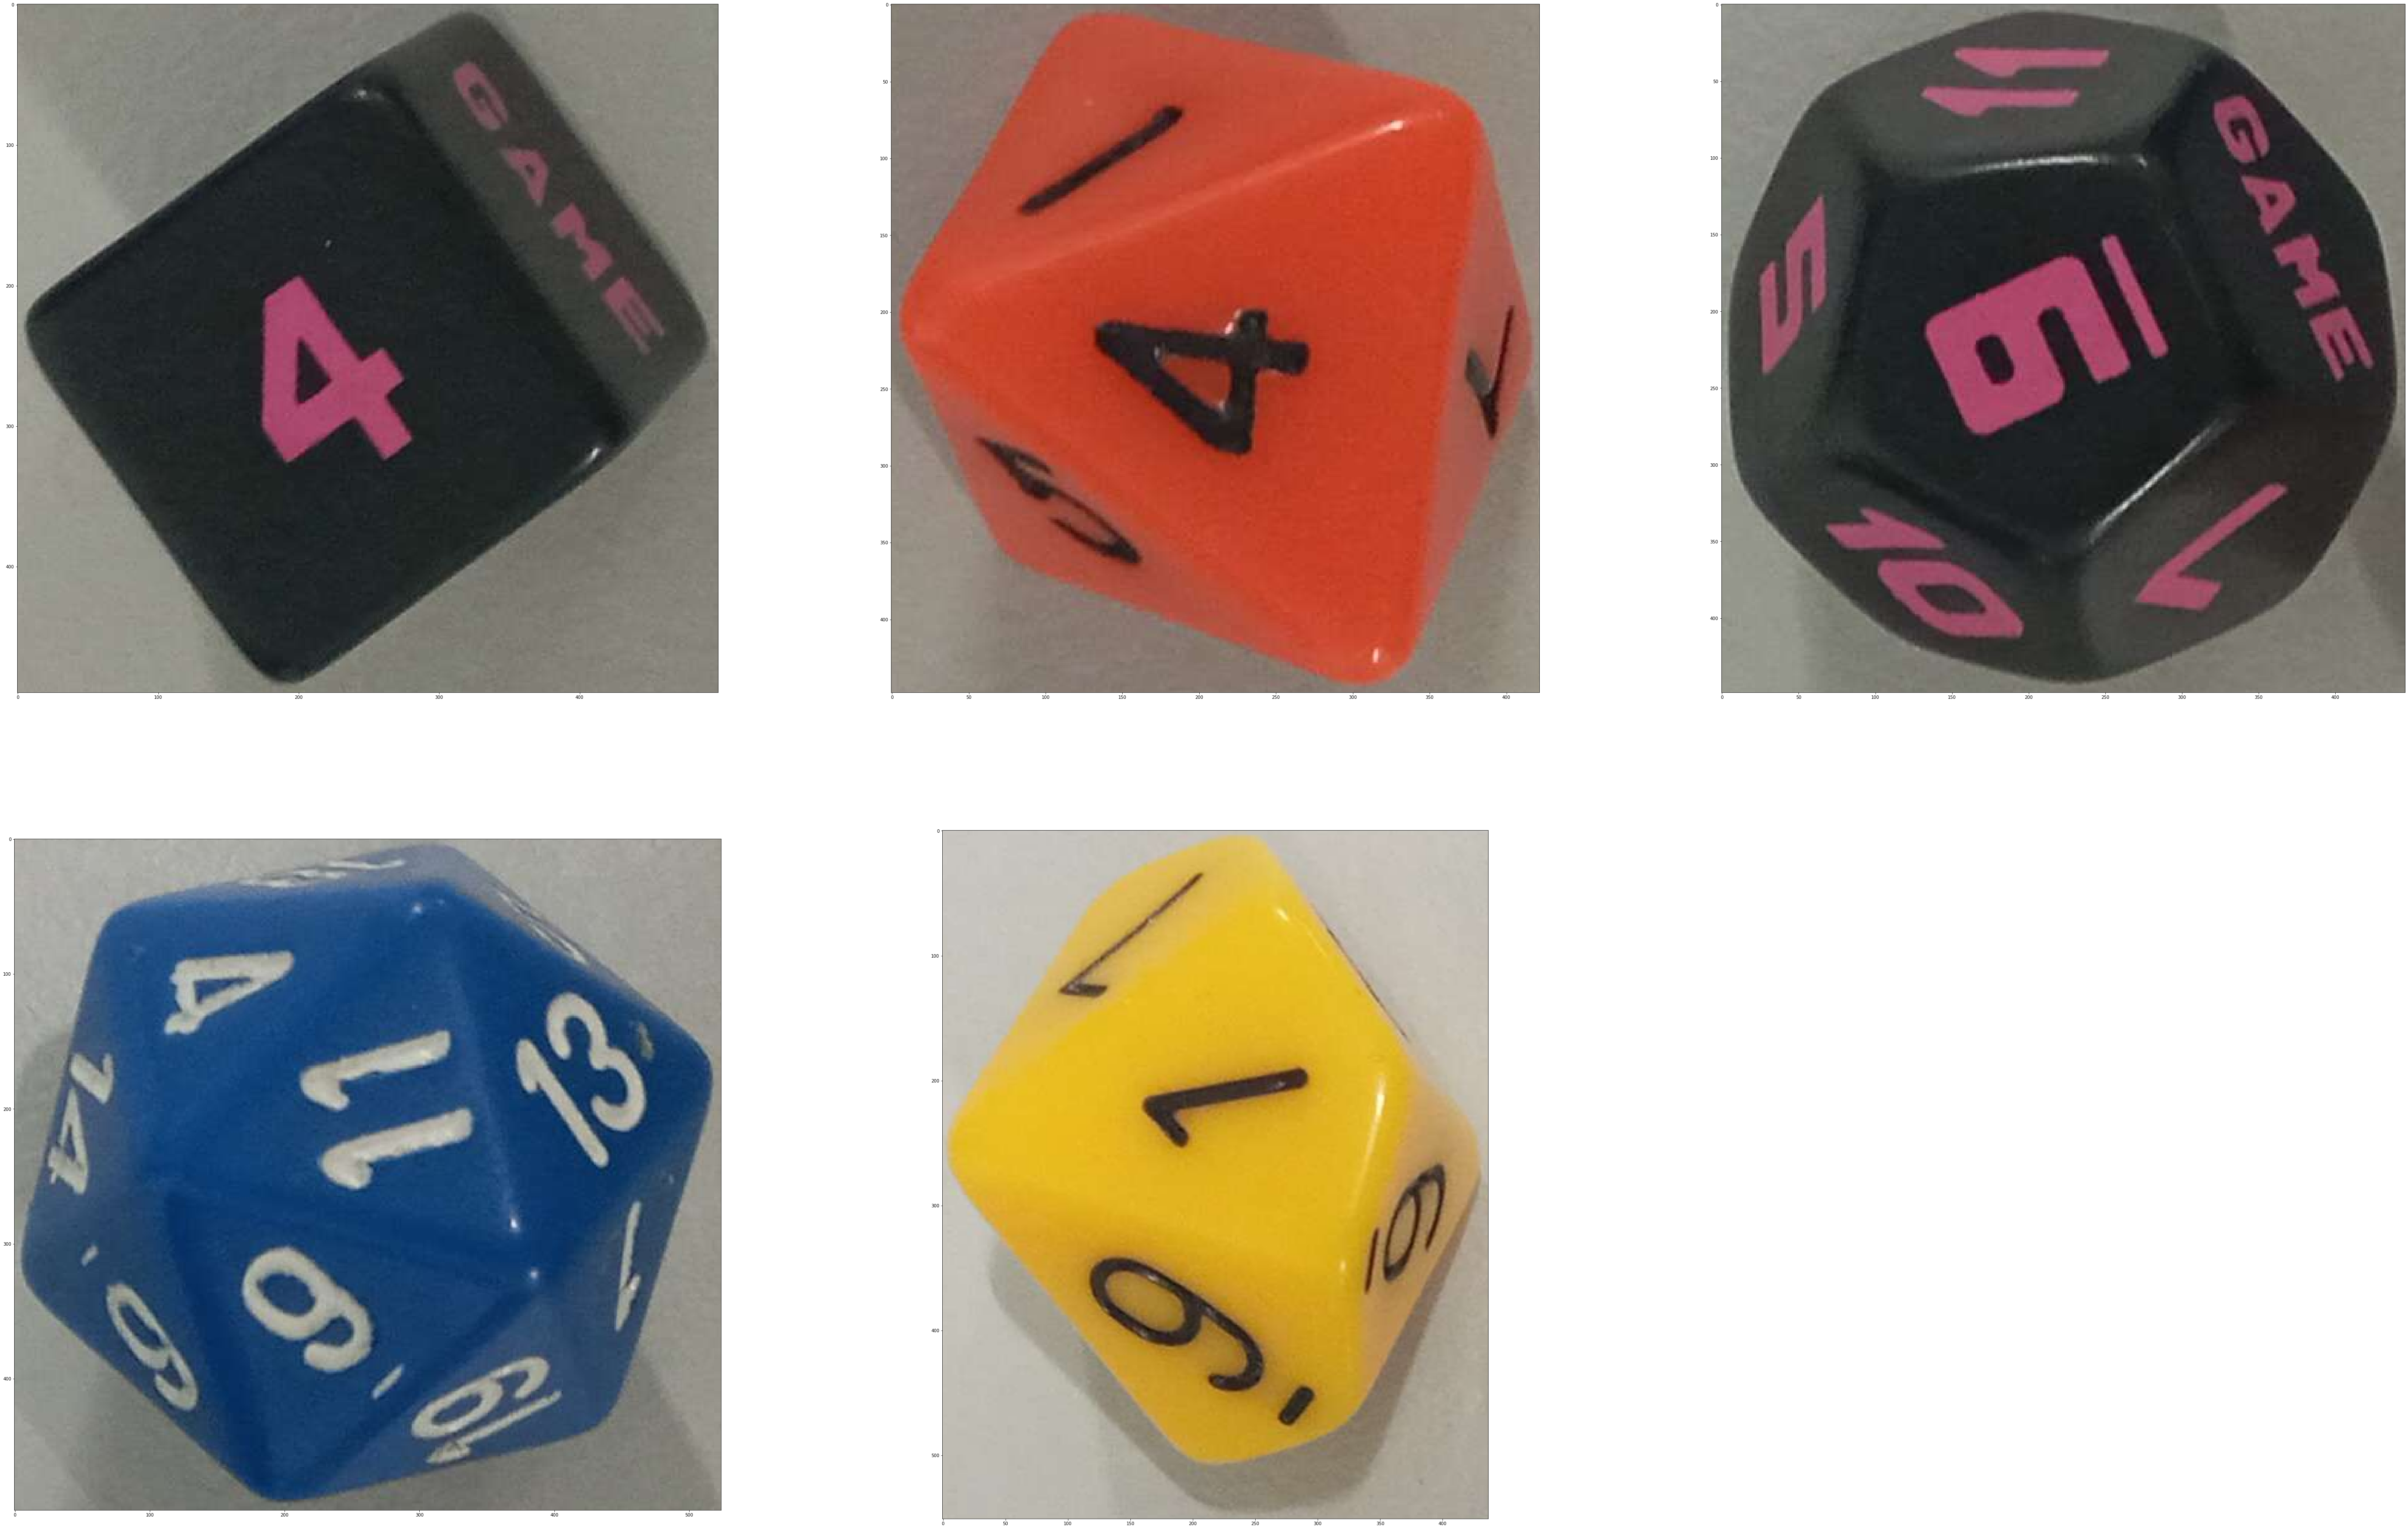

In [30]:
#debuing heres what we got:
plt.figure(figsize=(100,100))
i = 1
for image in diceImages:
    plt.subplot(3,3,i),plt.imshow(image)
    i += 1

exporting the dice as indvidual images

this will make working with them easier for step 2

In [31]:
i = 1
for image in diceImages:
    imageI = image
    if(fileName[-4:] == ".jpg" or fileName[5:] == ".jpeg"):
        imageI = cv2.cvtColor(imageI,cv2.COLOR_BGR2RGB)
    saveLoc = easygui.filesavebox(default="die"+str(i)+".png", filetypes=["*.jpg","*.jpeg","*.png"])
    i += 1
    isWritten = cv2.imwrite(saveLoc,imageI)
    if isWritten:
        print("worked!")

worked!
worked!
worked!
worked!
worked!
